# Import the data

In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.optimize import curve_fit

# Find all CSV files matching the pattern res_*.csv
csv_files = glob.glob('Group04/res_*.csv')
csv_files.sort()

print(f"Found {len(csv_files)} CSV files:")
for file in csv_files:
    print(f"  {file}")

# Read and concatenate all CSV files
all_dataframes = []
for file in csv_files:
    df_temp = pd.read_csv(file, index_col=0)
    all_dataframes.append(df_temp)

# Concatenate all dataframes
df = pd.concat(all_dataframes, ignore_index=True)

print(f"Total number of particles analyzed: {df.__len__()}")

# Filter out particles based on specified criteria
# df = df[df['AR'] <= 1.4].reset_index(drop=True)
# df = df[df['Minor'] <= 35].reset_index(drop=True)
# df = df[df['Round'] > 0.7].reset_index(drop=True)
# df = df[df['Circ.'] > 0.7].reset_index(drop=True)

print(f"Number of particles after filtering: {df.__len__()}")

# Create arrays for each column
Area = df['Area'].values
Major = df['Major'].values
Minor = df['Minor'].values
Angle = df['Angle'].values
Circ = df['Circ.'].values
AR = df['AR'].values
Round = df['Round'].values
Solidity = df['Solidity'].values


Found 16 CSV files:
  Group04/res_01.csv
  Group04/res_02.csv
  Group04/res_03.csv
  Group04/res_04.csv
  Group04/res_05.csv
  Group04/res_06.csv
  Group04/res_07.csv
  Group04/res_08.csv
  Group04/res_09.csv
  Group04/res_13.csv
  Group04/res_14.csv
  Group04/res_15.csv
  Group04/res_16.csv
  Group04/res_17.csv
  Group04/res_18.csv
  Group04/res_19.csv
Total number of particles analyzed: 3790
Number of particles after filtering: 3790


# Create histograms and fit log-normal

# Area

Log-normal fit results for Area:
  shape = 0.73937 ± 0.00849
  scale = 421.62 ± 6.85

Mode and mean of the Area distribution with errors:
  Mode = 244.06 ± 6.87
  Mean = 554.15 ± 15.59
Radius (from area mode): 8.81 ± 0.12 nm
Radius (from area mean): 13.28 ± 0.19 nm


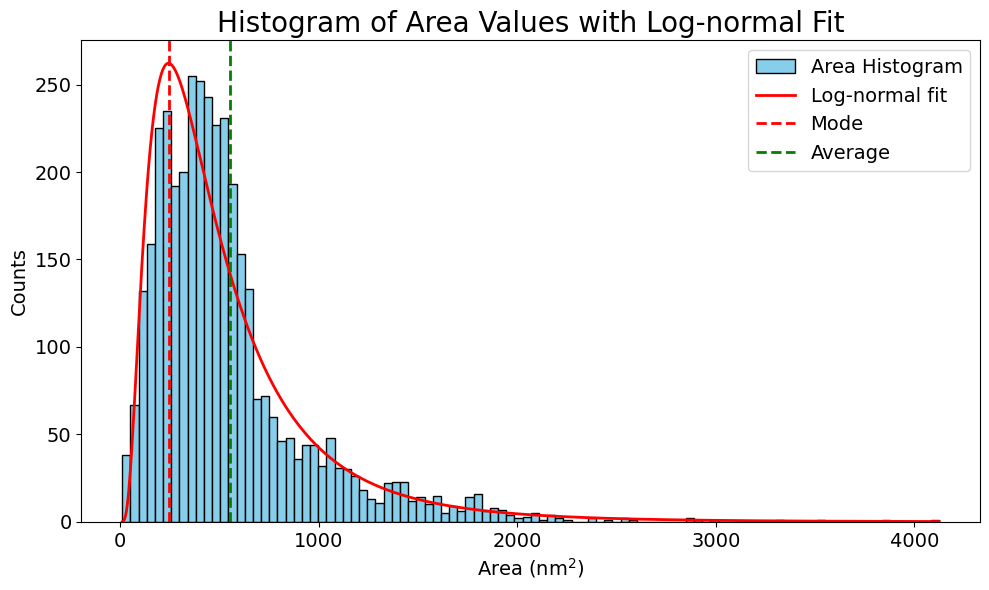

In [3]:
# Plot histogram of Area
plt.figure(figsize=(10, 6))
n_area, bins_area, patches_area = plt.hist(Area, bins=100, color='skyblue', edgecolor='black', label='Area Histogram')

# Fit a log-normal distribution to Area
x_area = np.linspace(min(Area), max(Area), 1000)
shape_area, loc_area, scale_area = lognorm.fit(Area, floc=0)
pdf_lognorm_area = lognorm.pdf(x_area, shape_area, loc=loc_area, scale=scale_area)
bin_width_area = bins_area[1] - bins_area[0]
pdf_lognorm_area_scaled = pdf_lognorm_area * len(Area) * bin_width_area

# Calculate uncertainties for Area fit parameters
n_area_points = len(Area)
sigma_shape_area = shape_area / np.sqrt(2 * n_area_points)
sigma_scale_area = scale_area / np.sqrt(n_area_points)
print("Log-normal fit results for Area:")
print(f"  shape = {shape_area:.5f} ± {sigma_shape_area:.5f}")
print(f"  scale = {scale_area:.2f} ± {sigma_scale_area:.2f}")

# Calculate mode and mean of the Area distribution with errors
mode_area = scale_area * np.exp(-shape_area**2)
mean_area = lognorm.mean(shape_area, loc=loc_area, scale=scale_area)

# Calculate uncertainties for mode and mean
sigma_mode_area = mode_area * np.sqrt((2 * sigma_shape_area / shape_area)**2 + (sigma_scale_area / scale_area)**2)
sigma_mean_area = mean_area * np.sqrt((2 * sigma_shape_area / shape_area)**2 + (sigma_scale_area / scale_area)**2)
print("\nMode and mean of the Area distribution with errors:")
print(f"  Mode = {mode_area:.2f} ± {sigma_mode_area:.2f}")
print(f"  Mean = {mean_area:.2f} ± {sigma_mean_area:.2f}")

# Calculate the radius from the mode and mean of the Area distribution
radius_mode_area = np.sqrt(mode_area / np.pi)
radius_mean_area = np.sqrt(mean_area / np.pi)

# Calculate uncertainties for the radii
sigma_radius_mode_area = 0.5 * sigma_mode_area / np.sqrt(np.pi * mode_area)
sigma_radius_mean_area = 0.5 * sigma_mean_area / np.sqrt(np.pi * mean_area)

print(f"Radius (from area mode): {radius_mode_area:.2f} ± {sigma_radius_mode_area:.2f} nm")
print(f"Radius (from area mean): {radius_mean_area:.2f} ± {sigma_radius_mean_area:.2f} nm")

# Plot
plt.plot(x_area, pdf_lognorm_area_scaled, 'r', linewidth=2, label='Log-normal fit')
plt.axvline(mode_area, color='red', linewidth=2, linestyle='--', label='Mode')
plt.axvline(mean_area, color='green', linewidth=2, linestyle='--', label='Average')
plt.xlabel('Area (nm$^2$)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.title('Histogram of Area Values with Log-normal Fit', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

# Radius


Log-normal fit results for Radius:
  shape = 0.36968 ± 0.00425
  scale = 11.58 ± 0.19

Mode and mean of the Radius distribution with errors:
  Mode = 10.10 ± 0.28
  Mean = 12.40 ± 0.35
Radius (from mode): 10.10 ± 0.28 nm
Radius (from mean): 12.40 ± 0.35 nm


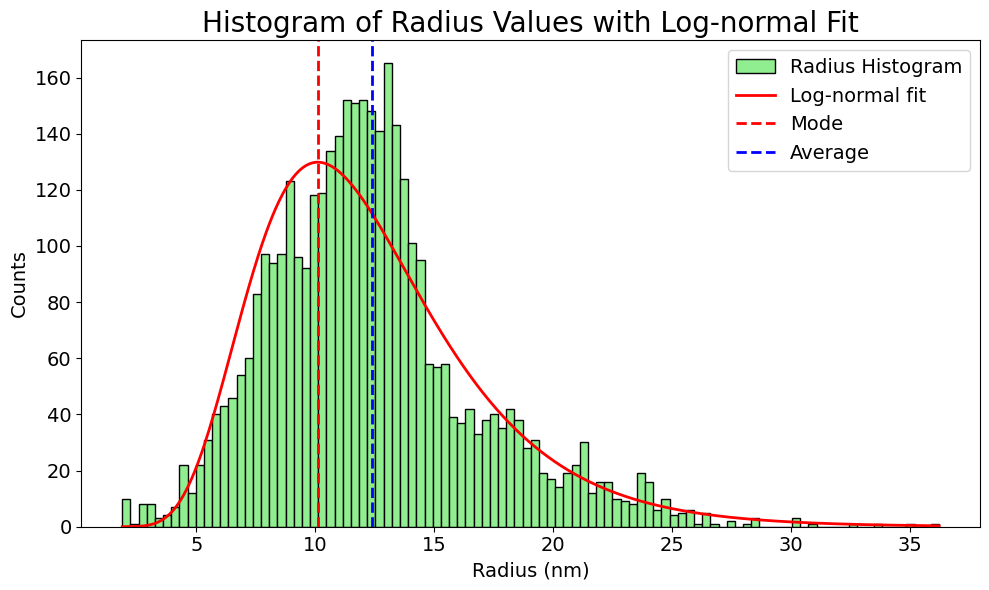

In [4]:

Radius = np.sqrt(Area / np.pi)

# Plot histogram of Radius
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(Radius, bins=100, color='lightgreen', edgecolor='black', label='Radius Histogram')

# Fit a log-normal distribution for comparison
x = np.linspace(min(Radius), max(Radius), 1000)
shape_rad, loc_rad, scale_rad = lognorm.fit(Radius, floc=0)
pdf_lognorm = lognorm.pdf(x, shape_rad, loc=loc_rad, scale=scale_rad)
bin_width = bins[1] - bins[0]
pdf_lognorm_scaled = pdf_lognorm * len(Radius) * bin_width

# Calculate uncertainties for Radius fit parameters
n_radius_points = len(Radius)
sigma_shape = shape_rad / np.sqrt(2 * n_radius_points)
sigma_scale = scale_rad / np.sqrt(n_radius_points)

print("\nLog-normal fit results for Radius:")
print(f"  shape = {shape_rad:.5f} ± {sigma_shape:.5f}")
print(f"  scale = {scale_rad:.2f} ± {sigma_scale:.2f}")

# Calculate mode and mean of the Radius distribution with errors
mode_rad = scale_rad * np.exp(-shape_rad**2)
mean_rad = lognorm.mean(shape_rad, loc=loc_rad, scale=scale_rad)

# Calculate uncertainties for mode and mean
sigma_mode_rad = mode_rad * np.sqrt((2 * sigma_shape / shape_rad)**2 + (sigma_scale / scale_rad)**2)
sigma_mean_rad = mean_rad * np.sqrt((2 * sigma_shape / shape_rad)**2 + (sigma_scale / scale_rad)**2)

print("\nMode and mean of the Radius distribution with errors:")
print(f"  Mode = {mode_rad:.2f} ± {sigma_mode_rad:.2f}")
print(f"  Mean = {mean_rad:.2f} ± {sigma_mean_rad:.2f}")

# Calculate the radius from the mode and mean of the Radius distribution
radius_mode_rad = mode_rad
radius_mean_rad = mean_rad

# Calculate uncertainties for the radii
sigma_radius_mode_rad = sigma_mode_rad
sigma_radius_mean_rad = sigma_mean_rad

print(f"Radius (from mode): {radius_mode_rad:.2f} ± {sigma_radius_mode_rad:.2f} nm")
print(f"Radius (from mean): {radius_mean_rad:.2f} ± {sigma_radius_mean_rad:.2f} nm")

# Plot
plt.plot(x, pdf_lognorm_scaled, 'r', linewidth=2, label='Log-normal fit')
plt.axvline(radius_mode_rad, color='red', linewidth=2, linestyle='--', label='Mode')
plt.axvline(radius_mean_rad, color='blue', linewidth=2, linestyle='--', label='Average')
plt.xlabel('Radius (nm)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.title('Histogram of Radius Values with Log-normal Fit', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

# Volume

Log-normal fit results for Volume:
  shape = 1.10905 ± 0.01274
  scale = 6512.40 ± 105.78

Mode and mean of the Volume distribution with errors:
  Mode = 1903.54 ± 53.56
  Mean = 12045.64 ± 338.90
Radius (from volume mode): 7.69 ± 0.19 nm
Radius (from volume mean): 14.22 ± 0.35 nm


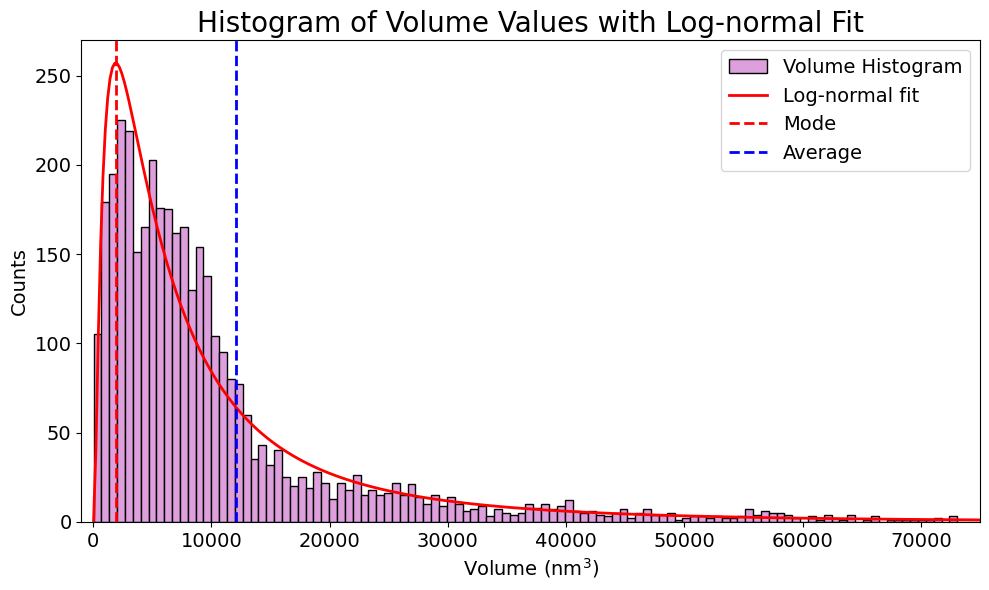

In [5]:

# Calculate volume assuming spherical particles: V = (4/3) * pi * R^3
Volume = (4/3) * np.pi * Radius**3

# Plot histogram of Volume
plt.figure(figsize=(10, 6))
n_vol, bins_vol, patches_vol = plt.hist(Volume, bins=300, color='plum', edgecolor='black', label='Volume Histogram')

# Fit a log-normal distribution to Volume
x_vol = np.linspace(min(Volume), max(Volume), 1000)
shape_vol, loc_vol, scale_vol = lognorm.fit(Volume, floc=0)
pdf_lognorm_vol = lognorm.pdf(x_vol, shape_vol, loc=loc_vol, scale=scale_vol)
bin_width_vol = bins_vol[1] - bins_vol[0]
pdf_lognorm_vol_scaled = pdf_lognorm_vol * len(Volume) * bin_width_vol

# Calculate uncertainties for Volume fit parameters
n_vol_points = len(Volume)
sigma_shape_vol = shape_vol / np.sqrt(2 * n_vol_points)
sigma_scale_vol = scale_vol / np.sqrt(n_vol_points)

print("Log-normal fit results for Volume:")
print(f"  shape = {shape_vol:.5f} ± {sigma_shape_vol:.5f}")
print(f"  scale = {scale_vol:.2f} ± {sigma_scale_vol:.2f}")

# Calculate mode and mean of the Volume distribution with errors
mode_vol = scale_vol * np.exp(-shape_vol**2)
mean_vol = lognorm.mean(shape_vol, loc=loc_vol, scale=scale_vol)

# Calculate uncertainties for mode and mean
sigma_mode_vol = mode_vol * np.sqrt((2 * sigma_shape_vol / shape_vol)**2 + (sigma_scale_vol / scale_vol)**2)
sigma_mean_vol = mean_vol * np.sqrt((2 * sigma_shape_vol / shape_vol)**2 + (sigma_scale_vol / scale_vol)**2)

print("\nMode and mean of the Volume distribution with errors:")
print(f"  Mode = {mode_vol:.2f} ± {sigma_mode_vol:.2f}")
print(f"  Mean = {mean_vol:.2f} ± {sigma_mean_vol:.2f}")

# Calculate the radius from the mode and mean of the Volume distribution
radius_mode_vol = (3 * mode_vol / (4 * np.pi))**(1/3)
radius_mean_vol = (3 * mean_vol / (4 * np.pi))**(1/3)

# Calculate uncertainties for the radii
sigma_radius_mode_vol = (1/3) * sigma_mode_vol / (radius_mode_vol**2 * (4 * np.pi / 3)**(1/3))
sigma_radius_mean_vol = (1/3) * sigma_mean_vol / (radius_mean_vol**2 * (4 * np.pi / 3)**(1/3))

print(f"Radius (from volume mode): {radius_mode_vol:.2f} ± {sigma_radius_mode_vol:.2f} nm")
print(f"Radius (from volume mean): {radius_mean_vol:.2f} ± {sigma_radius_mean_vol:.2f} nm")

# Plot
plt.plot(x_vol, pdf_lognorm_vol_scaled, 'r', linewidth=2, label='Log-normal fit')
plt.axvline(mode_vol, color='red', linewidth=2, linestyle='--', label='Mode')
plt.axvline(mean_vol, color='blue', linewidth=2, linestyle='--', label='Average')
plt.xlabel('Volume (nm$^3$)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xlim(-1000,75000)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.title('Histogram of Volume Values with Log-normal Fit', fontsize=20)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

# Effective radius

Log-normal parameters for Diameter: shape=0.36968 ± 0.00425, loc=0.00000, scale=23.17 ± 0.38
Mode of the distribution: 20.21 ± 0.57
Expected value (mean) of Diameter from the log-normal distribution: 24.81 ± 0.70
<D>: 24.71 ± 0.14
<D^3>^1/3: 27.75 ± 0.01


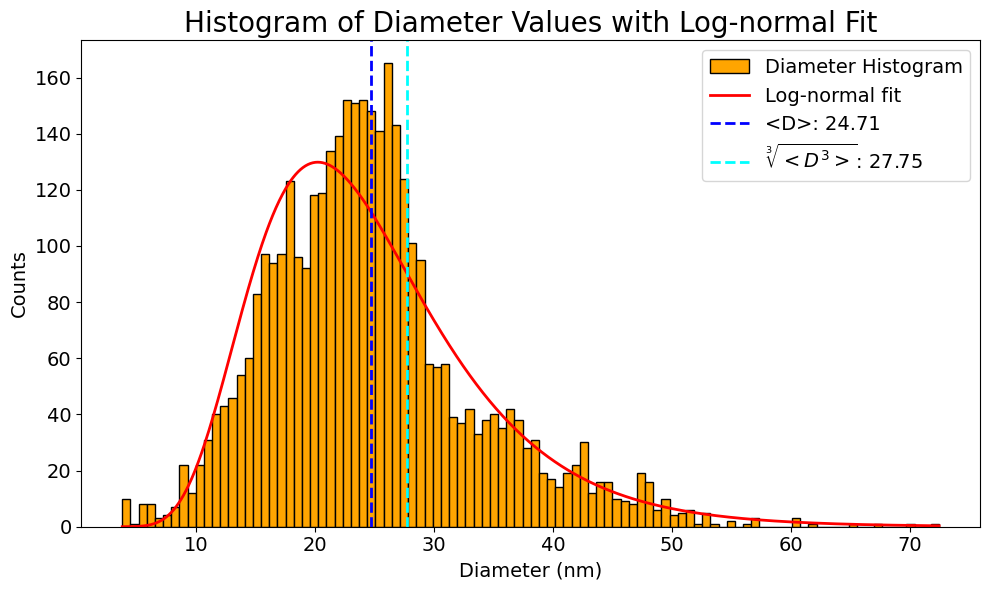

In [6]:
# Calculate diameter from Radius (Diameter = 2 * Radius)
Diameter = 2 * Radius
Diam_axis = (Major + Minor) / 2
Diam_avg = np.mean(Diameter)
Diam_sq = (np.mean(Diameter**3))**(1/3)

# Plot histogram of Diameter
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(Diameter, bins=100, color='orange', edgecolor='black', label='Diameter Histogram')

# Fit log-normal to Diameter
x = np.linspace(min(Diameter), max(Diameter), 1000)
shape_d, loc_d, scale_d = lognorm.fit(Diameter, floc=0)
pdf_lognorm_d = lognorm.pdf(x, shape_d, loc=loc_d, scale=scale_d)
bin_width = bins[1] - bins[0]
pdf_lognorm_d_scaled = pdf_lognorm_d * len(Diameter) * bin_width

# Calculate uncertainties for Diameter fit parameters
n_diameter_points = len(Diameter)
sigma_shape_d = shape_d / np.sqrt(2 * n_diameter_points)
sigma_scale_d = scale_d / np.sqrt(n_diameter_points)

print(f"Log-normal parameters for Diameter: shape={shape_d:.5f} ± {sigma_shape_d:.5f}, loc={loc_d:.5f}, scale={scale_d:.2f} ± {sigma_scale_d:.2f}")

# Calculate mode and mean of the Diameter distribution with errors
mode_d = scale_d * np.exp(-shape_d**2)
mean_d = lognorm.mean(shape_d, loc=loc_d, scale=scale_d)

# Calculate uncertainties for mode and mean
sigma_mode_d = mode_d * np.sqrt((2 * sigma_shape_d / shape_d)**2 + (sigma_scale_d / scale_d)**2)
sigma_mean_d = mean_d * np.sqrt((2 * sigma_shape_d / shape_d)**2 + (sigma_scale_d / scale_d)**2)

print(f"Mode of the distribution: {mode_d:.2f} ± {sigma_mode_d:.2f}")
print(f"Expected value (mean) of Diameter from the log-normal distribution: {mean_d:.2f} ± {sigma_mean_d:.2f}")

# Calculate uncertainties for Diam_avg and Diam_sq
sigma_diam_avg = np.std(Diameter) / np.sqrt(n_diameter_points)
sigma_diam_sq = (1/3) * np.std(Diameter**3)**(1/3) / (Diam_sq**2)

print(f"<D>: {Diam_avg:.2f} ± {sigma_diam_avg:.2f}")
print(f"<D^3>^1/3: {Diam_sq:.2f} ± {sigma_diam_sq:.2f}")

# Plot histogram and fitted log-normal PDF
plt.plot(x, pdf_lognorm_d_scaled, 'r', linewidth=2, label='Log-normal fit')
plt.xlabel('Diameter (nm)', fontsize=14)
plt.ylabel('Counts', fontsize=14)

# Plot lines at Diam_avg and Diam_sq
plt.axvline(Diam_avg, color='blue', linewidth=2, linestyle="--", label=f'<D>: {Diam_avg:.2f}')
plt.axvline(Diam_sq , color='cyan', linewidth=2, linestyle="--", label=f'$\sqrt[3]{{<D^3>}}$: {Diam_sq:.2f}')

plt.title('Histogram of Diameter Values with Log-normal Fit', fontsize=20)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.tight_layout()
plt.show()


# Aspect ratio

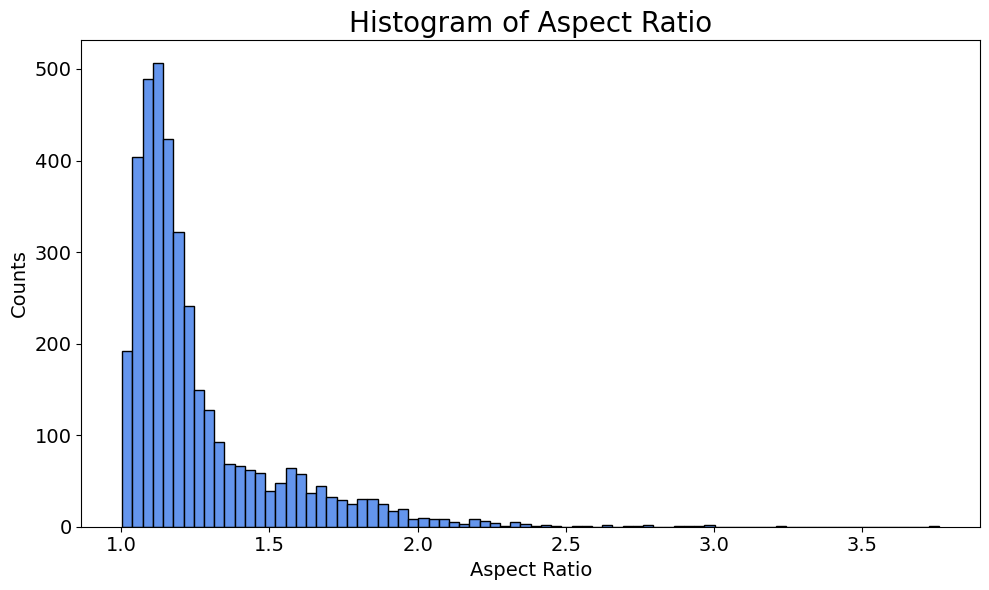

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(AR, bins=80, color='cornflowerblue', edgecolor='black')
plt.xlabel('Aspect Ratio', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of Aspect Ratio', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.tight_layout()
plt.show()

# Roundness

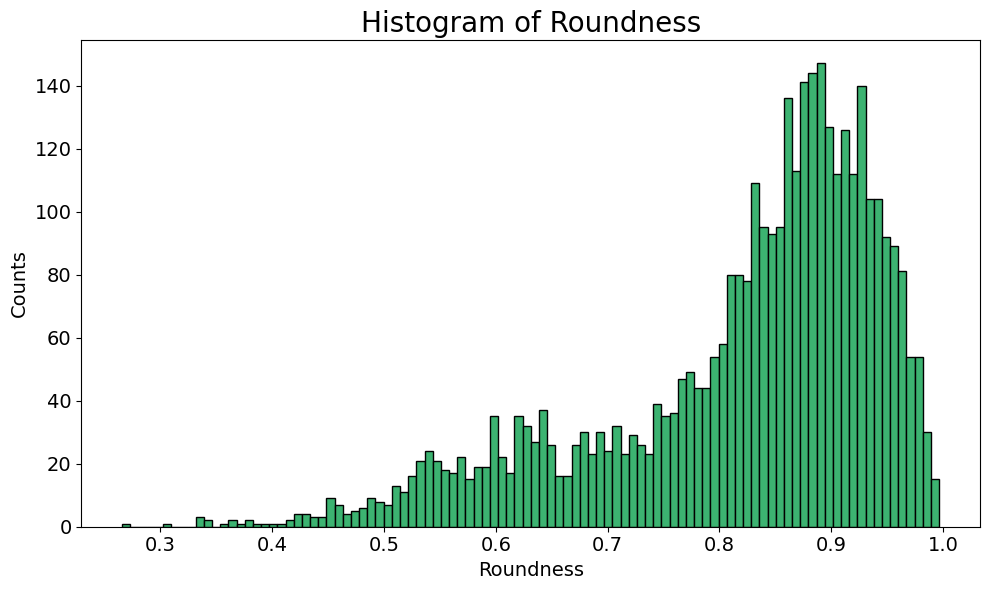

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(Round, bins=100, color='mediumseagreen', edgecolor='black')
plt.xlabel('Roundness', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of Roundness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.tight_layout()
plt.show()

# Major and minor axis

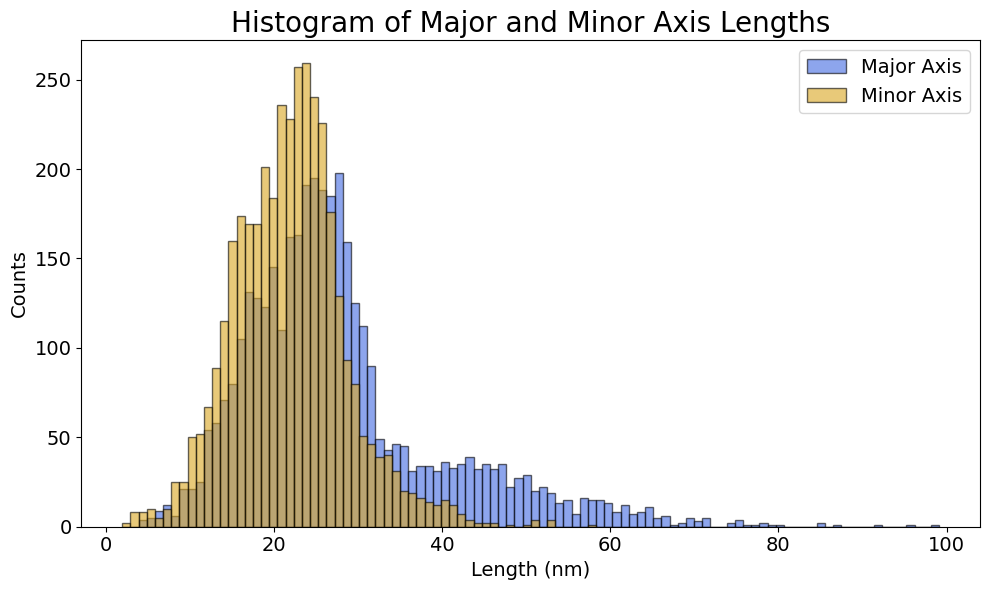

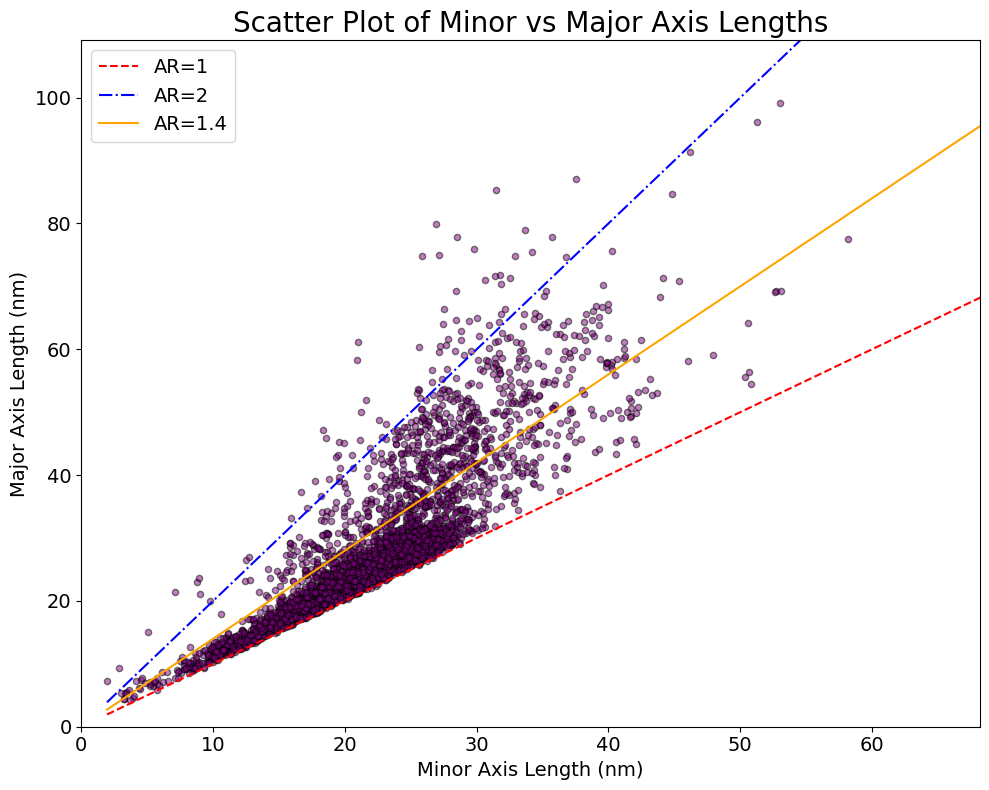

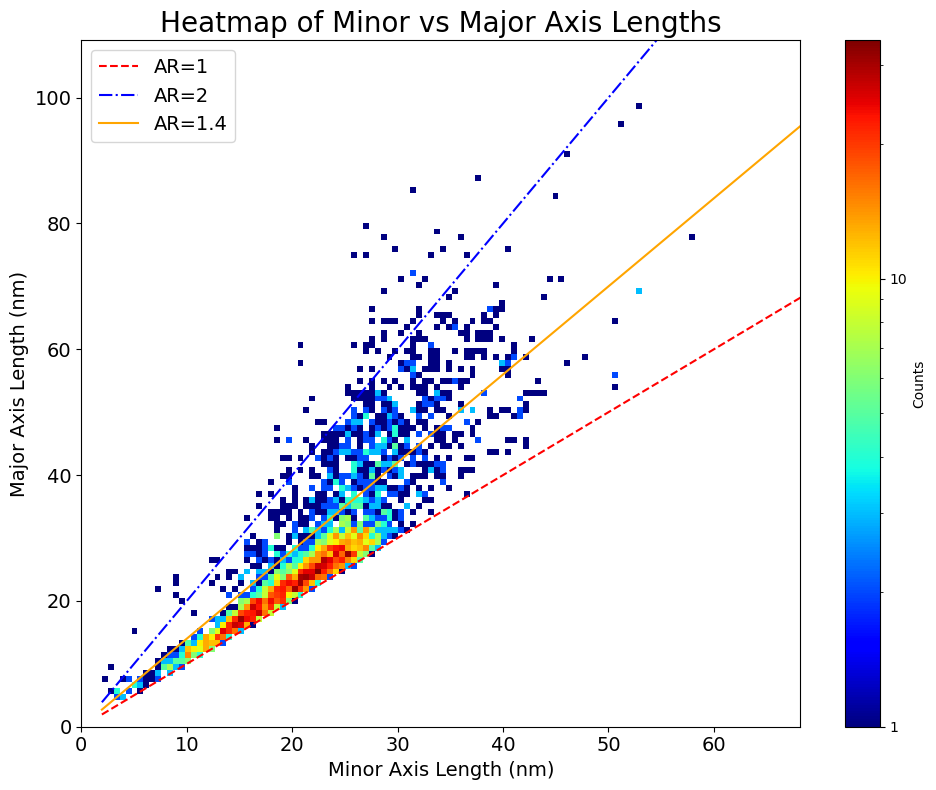

In [13]:
# Combine Major and Minor for common bin edges
combined = np.concatenate([Major, Minor])
bin_edges = np.histogram_bin_edges(combined, bins=100)

plt.figure(figsize=(10, 6))
plt.hist(Major, bins=bin_edges, alpha=0.6, label='Major Axis', color='royalblue', edgecolor='black')
plt.hist(Minor, bins=bin_edges, alpha=0.6, label='Minor Axis', color='goldenrod', edgecolor='black')
plt.xlabel('Length (nm)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Histogram of Major and Minor Axis Lengths', fontsize=20)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(Minor, Major, alpha=0.5, color='purple', edgecolor='k', s=20)
plt.xlabel('Minor Axis Length (nm)', fontsize=14)
plt.ylabel('Major Axis Length (nm)', fontsize=14)
plt.title('Scatter Plot of Minor vs Major Axis Lengths', fontsize=20)

# Add m=1 and m=2 lines
lims = [min(np.min(Minor), np.min(Major)), max(np.max(Minor), np.max(Major))]
plt.plot(lims, lims, 'r--', label='AR=1')
plt.plot(lims, [2*x for x in lims], 'b-.', label='AR=2')
plt.plot(lims, [1.4*x for x in lims], 'orange', label='AR=1.4')

plt.xlim(0, Minor.max()+10)
plt.ylim(0, Major.max()+10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.tight_layout()
plt.show()

from matplotlib.colors import LogNorm

plt.figure(figsize=(10, 8))
plt.hist2d(Minor, Major, bins=100, cmap='jet', norm=LogNorm(), cmin=0.1)
plt.colorbar(label='Counts', format='%d')
plt.xlabel('Minor Axis Length (nm)', fontsize=14)
plt.ylabel('Major Axis Length (nm)', fontsize=14)
plt.title('Heatmap of Minor vs Major Axis Lengths', fontsize=20)

# Add m=1 and m=2 lines
lims = [min(np.min(Minor), np.min(Major)), max(np.max(Minor), np.max(Major))]
plt.plot(lims, lims, 'r--', label='AR=1')
plt.plot(lims, [2*x for x in lims], 'b-.', label='AR=2')
plt.plot(lims, [1.4*x for x in lims], 'orange', label='AR=1.4')

plt.xlim(0, Minor.max()+10)
plt.ylim(0, Major.max()+10)
plt.legend(fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.tight_layout()
plt.show()